# Projekt Analiza Danych
## Aleksander Golus 240665, 5I01 23/24
## Drug Consumption (Quantified) Data Set - Informacje projektowe
[Link do setu danych](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)
- Set danych zawiera informacje o konsumpcji narkotyków i używek (dalej nazywanych narkotykami) przez osoby w różnym wieku i płci. Badanych było 1885 osób.
- Dane zawierają 12 kolumn z danymi osobowymi oraz 18 kolumn z informacjami o konsumpcji narkotyków
- Kolumny z danymi osobowymi zawierają informacje o wieku, płci, wykształceniu, pochodzeniu i innych
- Kolumny z informacjami o konsumpcji narkotyków zawierają informacje o konsumpcji 18 różnych substancji
- Dane są w formie liczbowej, gdzie 0 oznacza brak konsumpcji, a liczby od 1 do 6 oznaczają różne poziomy konsumpcji

## Cel projektu
Celem projektu jest analiza danych, która ma na celu znalezienie zależności między konsumpcją narkotyków a danymi osobowymi. Na podstawie tych zależności chcemy stworzyć model, który będzie przewidywał podatność na konsumpcję narkotyków na podstawie danych osobowych.

## Znaczenie danych
Dane można podzielić na trzy kategorie:
- Dane osobowe
- Dane o osobowości
- Dane o konsumpcji narkotyków

### Dane osobowe
#### Age - wiek
| Wartość | Znaczenie | Część |
| --- | --- | --- |
| -0.95197 | 18-24 | 34.11% |
| -0.07854 | 25-34 | 25.52% |
| 0.49788 | 35-44 | 18.89% |
| 1.09449 | 45-54 | 15.60% |
| 1.82213 | 55-64 | 4.93% |
| 2.59171 | 65+ | 0.95% |

#### Gender - Płeć
| Wartość  | Znaczenie | Część  |
|----------| --- |--------|
| -0.48246 | Mężczyzna | 49.97% |
| 0.48246 | Kobieta | 50.03% |

#### Education - Wykształcenie
| Wartość | Znaczenie                            | Część  |
| --- |--------------------------------------|--------|
| -2.43591 | Opuścił szkołę przed 16 rokiem życia | 1.49%  |
| -1.73790 | Opuścił szkołę w wieku 16-17 lat     | 5.25%  |
| -1.43719 | Opuścił szkołę w wieku 17-18 lat     | 1.59%  |
| -1.22751 | Opuścił szkołę w wieku 18+ lat       | 5.31%  |
| -0.61113 | Ukończył szkołę lub uniwersytet bez dyplomu | 26.84% |
| -0.05921 | Dyplom zawodowy                     | 14.32% |
| 0.45468 | Dyplom uniwersytecki                | 25.46% |
| 1.16365 | Dyplom magistra                     | 15.01% |
| 1.98437 | Dyplom doktora                      | 4.72%  |

#### Country - Kraj pochodzenia
| Wartość | Znaczenie   | Część  |
| --- |-------------| ------|
| -0.57009 | USA | 29.55% |
| -0.46841 | Nowa Zelandia | 0.27%  |
| -0.28519 | Inny       | 6.26%  |
| -0.09765 | Australia   | 2.86%  |
| 0.21128 | Irlandia    | 1.06%  |
| 0.24923 | Kanada      | 4.62%  |
| 0.96082 | UK         | 55.38% |

#### Ethnicity - Etniczność
| Wartość | Znaczenie                | Część  |
| --- |--------------------------| ------|
| -1.10702 | Czarny                   | 1.75%  |
| -0.50212 | Azjata                   | 1.38%  |
| -0.31685 | Biały                    |  91.25% |
| -0.22166 | Mieszaniec Biały/Czarny  | 1.06%  |
| 0.11440 | Inny                     | 3.34%  |
| 0.12600 | Mieszaniec Biały/Azjata  | 1.06%  |
| 1.90725 | Mieszaniec Czarny/Azjata | 0.16%  |

### Dane o osobowości
Dane o osobowości zostały zebrane za pomocą testu osobowości NEO-FFI-R. Szczegółowe informacje o teście można znaleźć [tutaj](https://en.wikipedia.org/wiki/NEO_Personality_Inventory). Jest to skrócona wersja testu osobowości NEO-PI-R, która składa się z 60 pytań. Wyniki testu są skwantyfikowane i nie wymagają interpretacji.

### Dane o konsumpcji narkotyków
Dane o konsumpcji narkotyków zostały zebrane za pomocą testu konsumpcji narkotyków. Test ten składa się z 18 pytań, które dotyczą konsumpcji różnych narkotyków. Wyniki testu są przedstawione w formie liczbowej, gdzie 0 oznacza brak konsumpcji, a liczby od 1 do 6 oznaczają różne poziomy konsumpcji.

| Wartość | Znaczenie                       |
| --- |---------------------------------|
| CL0 | Nigdy nie konsumował            |
| CL1 | Konsumował ponad 10 lat temu    |
| CL2 | Konsumował w ostatniej dekadzie |
| CL3 | Konsumował w ostatnim roku      |
| CL4 | Konsumował w ostatnim miesiącu  |
| CL5 | Konsumował w ostatnim tygodniu  |
| CL6 | Konsumował w ostatnim dniu      |


## Wczytanie danych
Wraz z wczytaniem setu danych wczytujemy również biblioteki, które będą nam potrzebne do analizy danych, oraz niezbędne tablice i funkcje pomocnicze.

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def read_data():
    return pd.read_csv('drug_consumption.csv', delimiter=';')

consumption_data_columns = ['alcohol','amphetamines','amyl nitrite','benzodiazepine','cannabis','chocolate','cocaine','caffeine','crack','ecstasy','heroin','ketamine','legal highs','LSD','methadone','mushrooms','nicotine','volatile substance abuse','semeron']
personal_information_data_columns = ['age', 'gender', 'level of education', 'country of residence', 'ethnicity']
personality_data_columns = ['neuroticism', 'extraversion', 'openness to experience', 'agreeableness', 'conscientiousness', 'impulsivity', 'sensation seeking']

data = read_data()
data.head()

,ID,age,gender,level of education,country of residence,ethnicity,neuroticism,extraversion,openness to experience,agreeableness,...,ecstasy,heroin,ketamine,legal highs,LSD,methadone,mushrooms,nicotine,semeron,volatile substance abuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Obróbka danych
Dane zawierające informacje o konsumpcji narkotyków są zapisane w formie tekstowej. Aby ułatwić analizę, zamieniamy je na wartości liczbowe. Nie potrzebujemy również kolumny 'ID', więc ją usuwamy.

In [359]:
def map_consumption_values(data):
    consumption_values = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    for column in consumption_data_columns:
        data[column] = data[column].map({value: index for index, value in enumerate(consumption_values)})
    data = data.drop(columns=['ID'])
    return data

data = map_consumption_values(data)
data.head()

,age,gender,level of education,country of residence,ethnicity,neuroticism,extraversion,openness to experience,agreeableness,conscientiousness,...,ecstasy,heroin,ketamine,legal highs,LSD,methadone,mushrooms,nicotine,semeron,volatile substance abuse
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


## Wstępna analiza danych
Z racji takiej, że ilość informacji w danych jest bardzo duża, zaczniemy od wstępnej analizy danych. Sprawdzimy jakie są rozkłady danych, jakie są korelacje między danymi oraz jakie są zależności między danymi osobowymi a konsumpcją narkotyków.


### Podstawowe dane osobowe
Sprawdźmy również kto reprezentuje większość w badanej grupie, jakie są rozkłady wieku, płci, wykształcenia, kraju pochodzenia oraz etniczności. Wykorzystamy do tego funkcję `show_basic_personal_info`, która wyświetla wykresy słupkowe dla każdej z kolumn.

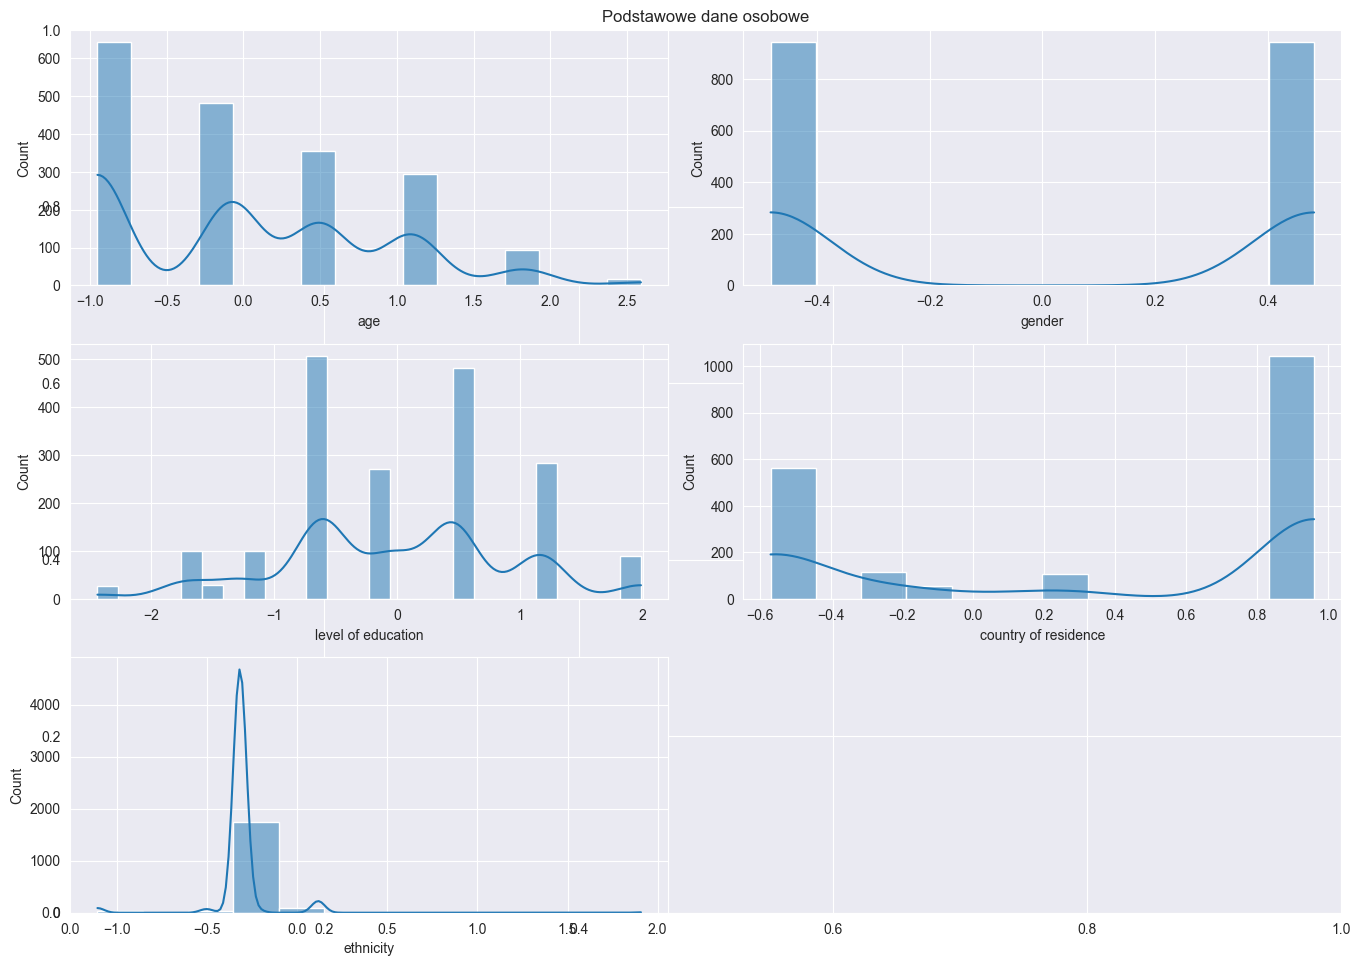

In [360]:
def show_basic_personal_info(data, columns, title):
    plt.figure(figsize=(14, 10))
    plt.title(title)
    for i, column in enumerate(columns):
        plt.subplot(3, 2, i + 1)
        sns.histplot(data[column], kde=True)
    plt.tight_layout()
    plt.show()
    
show_basic_personal_info(data, personal_information_data_columns, 'Podstawowe dane osobowe')

#### Wnioski z podstawowych danych osobowych
Analizując podstawowe dane osobowe, możemy jasno stwierdzić, że większość osób badanych to młodzi ludzie w wieku 18-24 lat. Większość badanych ma wyższe wykształcenie, jest z USA lub UK i jest biała. Płeć jest równomiernie rozłożona.

### Ilość konsumpcji narkotyków
Aby zobaczyć jakie są rozkłady konsumpcji narkotyków, tworzymy histogramy dla każdego z narkotyków. Wykorzystamy do tego funkcję `show_histograms`, która wyświetla histogramy dla każdej z kolumn.

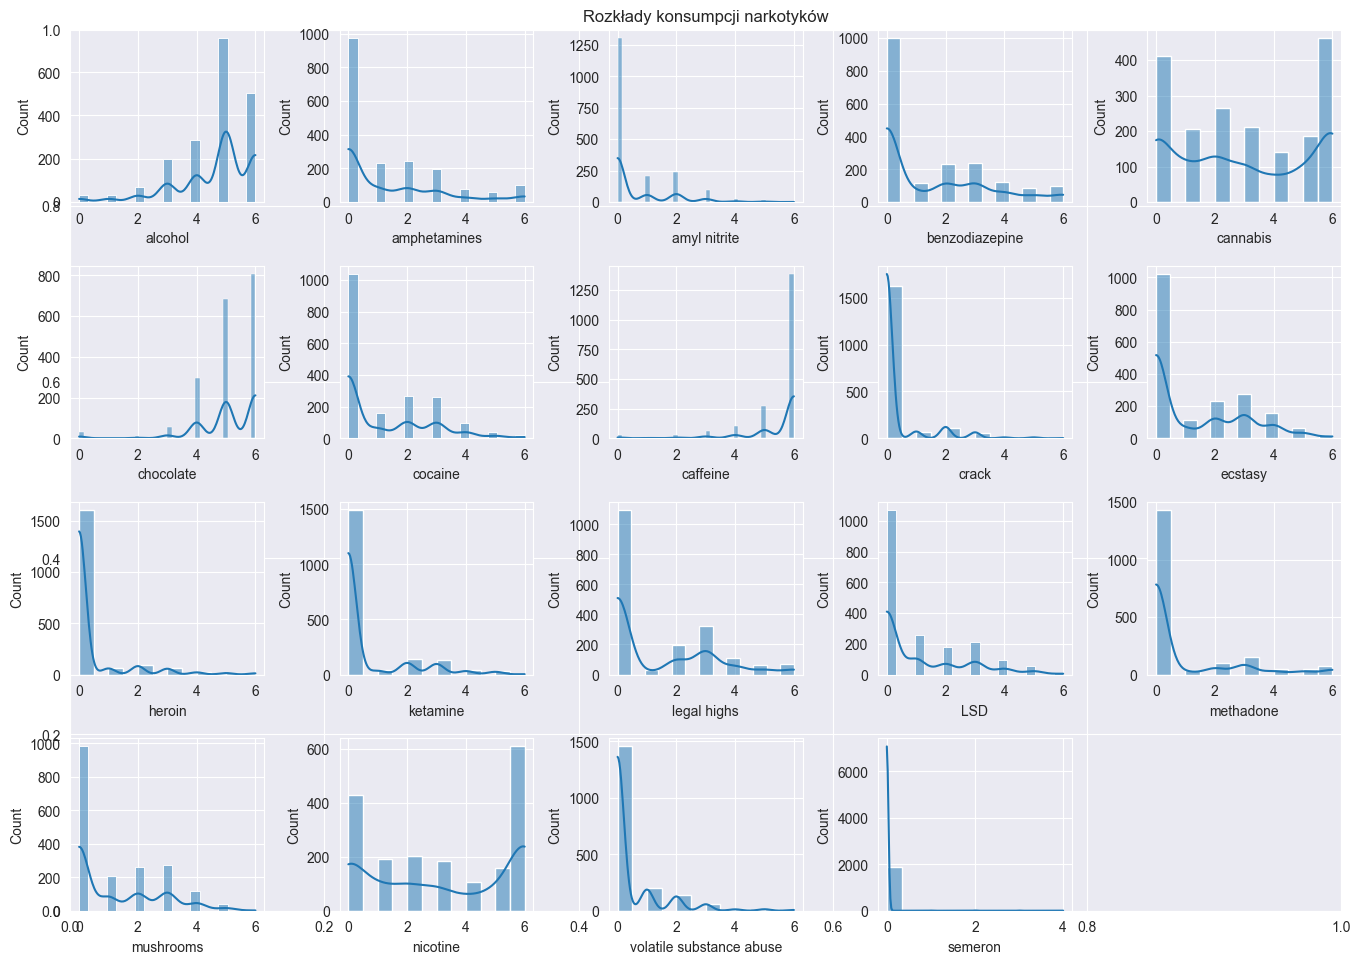

In [361]:
def show_histograms(data, columns, title):
    plt.figure(figsize=(14, 10))
    plt.title(title)
    for i, column in enumerate(columns):
        plt.subplot(4, 5, i + 1)
        sns.histplot(data[column], kde=True)
    plt.tight_layout()
    plt.show()

show_histograms(data, consumption_data_columns, 'Rozkłady konsumpcji narkotyków')

#### Wnioski z histogramów konsumpcji
Analizując histogramy widzimy, że dane raczej zgadzają się z ogólnymi założeniami i oczekiwaniami. Można zauważyć częste spożycie czekolady wśród ludzi, bardzo częstą konsumpcję kofeiny (co często wiemy jest związane z rutynową kawą).

Można zauważyć, że alkohol w większości badanych był spożywany w ostatnim tygodniu, co zgadzałoby się z raczej przeciętnym zachowaniem osoby młodej.

Widać również, że konsumpcja ciężkich narkotyków (takich jak crack, heroina, ecstasy) jest dużo rzadsza niż konsumpcja lżejszych używek (takich jak alkohol, kofeina).

Jeden wykres, który jest wyjątkowo równo rozłożony to wykres konsumpcji marihuany. Widać, że większość albo nigdy nie zażywała, albo zażywała w ciągu ostatnich 24h, co sugerowałoby, że jest to używka uzależniająca, jednakże wykres jednoznacznie wskazuje że spora część badanych konsumuje marihuanę sporadycznie, albo jeszcze rzadziej.

### Korelacje między danymi osobowymi oraz danymi osobościowymi a konsumpcją narkotyków
Aby zobaczyć jakie korelacje występują między danymi osobowymi a konsumpcją narkotyków, oraz między danymi o osobowości a konsumpcją narkotyków, tworzymy macierze korelacji. Wykorzystamy do tego funkcję `create_correlation_matrix`, która zwraca macierz korelacji, oraz funkcję `show_correlation_matrix`, która wyświetla macierz korelacji w formie graficznej.

In [362]:
def create_correlation_matrix(data_to_correlate):
    correlation_matrix = data_to_correlate.corr()
    np.fill_diagonal(correlation_matrix.values, None)
    return correlation_matrix

def show_correlation_matrix(correlation_matrix, title):
    plt.figure(figsize=(14, 10))
    plt.title(title)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Korelacja'} )
    plt.show()

#### Korelacje między danymi osobowymi a konsumpcją narkotyków

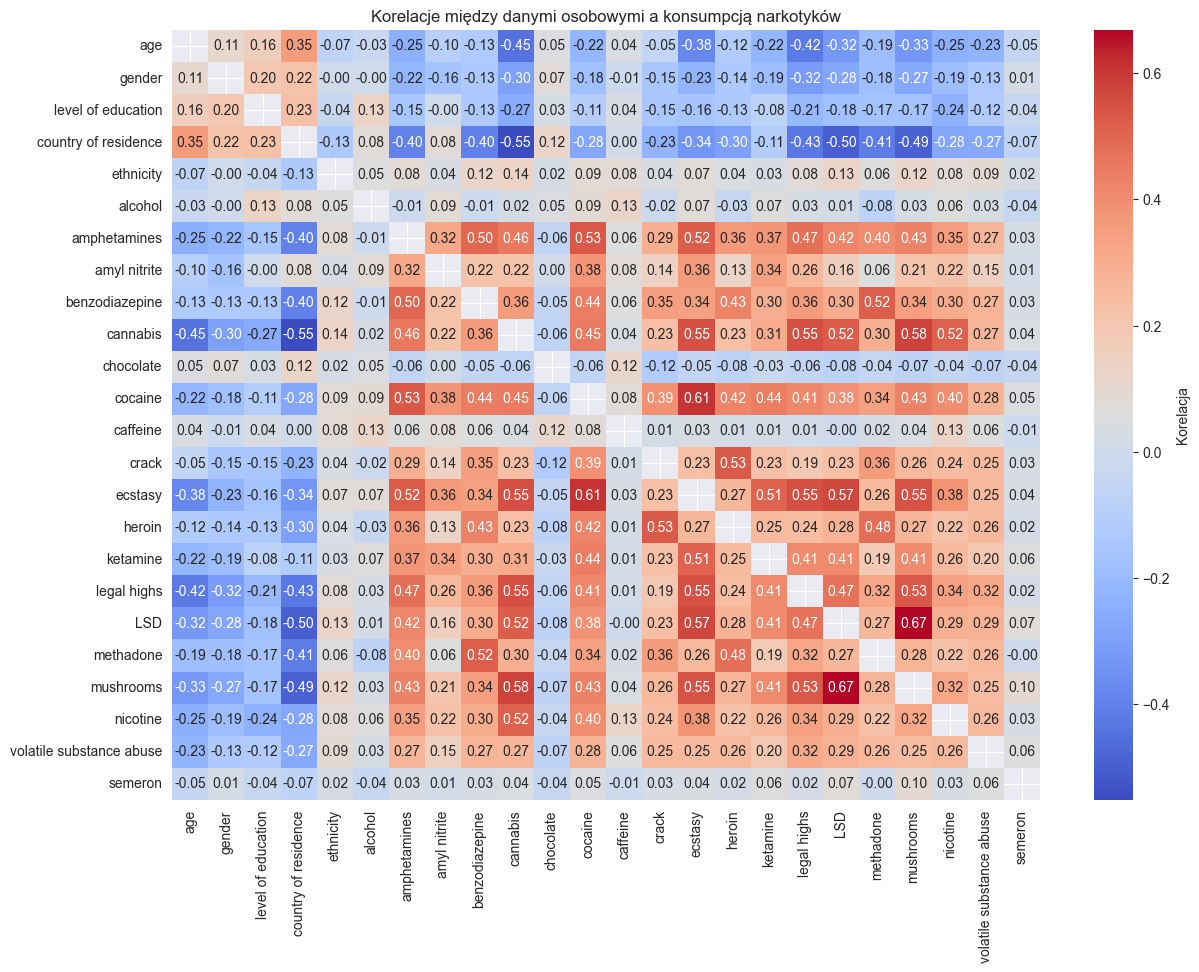

In [363]:
personal_info_and_drug_data = data[personal_information_data_columns + consumption_data_columns]
correlation_matrix_personal_info_drug = create_correlation_matrix(personal_info_and_drug_data)
show_correlation_matrix(correlation_matrix_personal_info_drug, 'Korelacje między danymi osobowymi a konsumpcją narkotyków')

##### Wnioski z macierzy korelacji
Analizując macierz korelacji między danymi osobowymi a konsumpcją narkotyków, możemy zauważyć kilka ciekawych zależności:

##### Wiek
Wiek jak się okazuje ma silne ujemne korelacje z konsumpcją narkotyków. Oznacza to, że im starsza osoba, tym mniej prawdopodobne, że konsumuje narkotyki. Jest to intuicyjne, ponieważ zazwyczaj uważa się, że osoby młodsze są bardziej podatne na konsumpcję narkotyków ze względu na ciekaawość, chęć eksperymentowania i brak doświadczenia.

##### Płeć
Ciekawym jest fakt, że płeć wykazuje korelację z konsumpcją. Z macierzy wynika, że mężczyźni częściej konsumują każdy z narkotyków.

##### Wykształcenie
Jak można było założyć - osoby o wyższej edukacji mniej konsumują narkotykó, natomiast częściej konsumują alkohol.

##### Kraj pochodzenia oraz etniczność
Z uwagi na to, że większość badanych było z UK lub USA, a etniczność była zazwyczaj biała, to korelacje z tymi danymi są mało znaczące. Mimo wszystko korelacje są zbliżone do zera.

#### Korelacje między danymi o osobowości a konsumpcją narkotyków

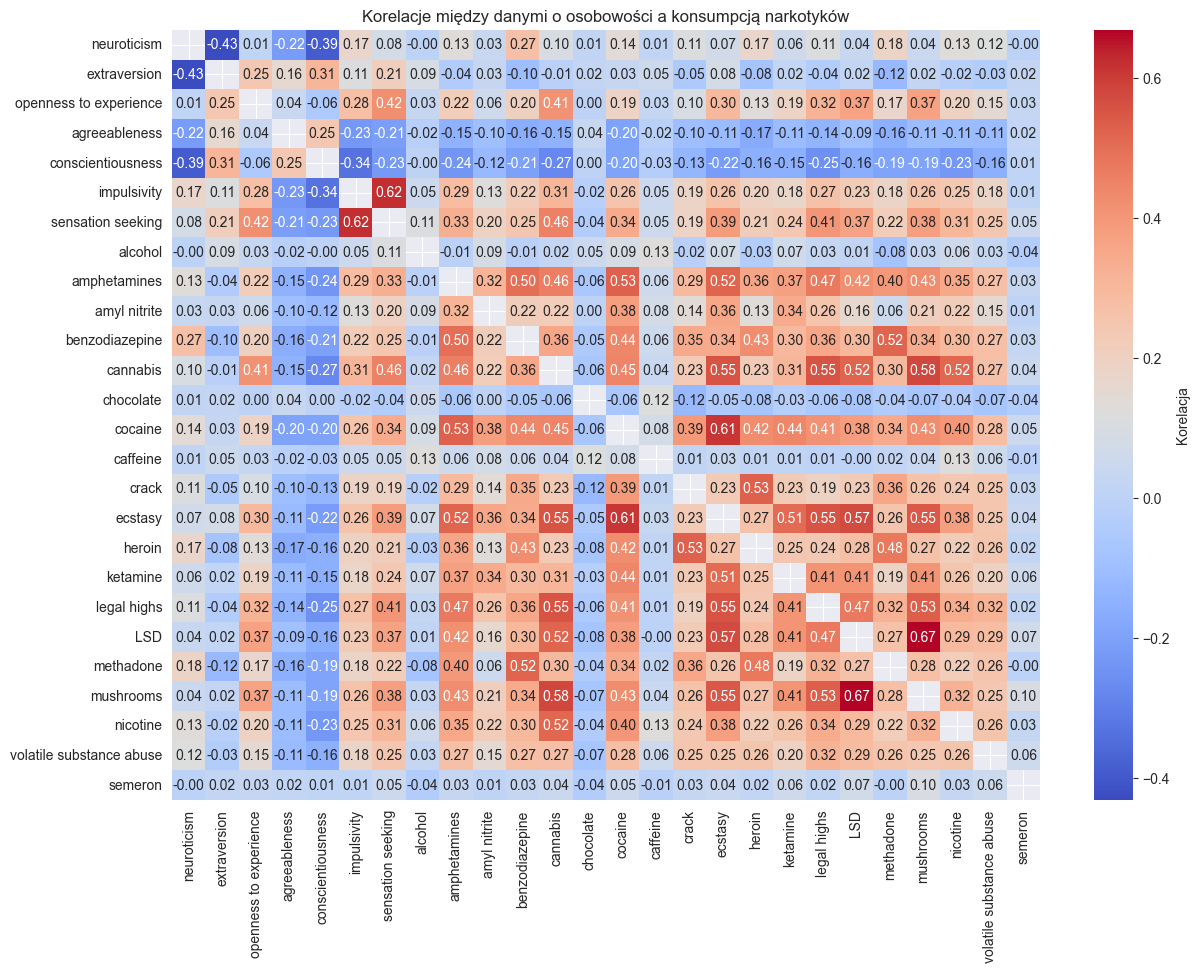

In [364]:
personality_and_drug_data = data[personality_data_columns + consumption_data_columns]
correlation_matrix_personality_drug = create_correlation_matrix(personality_and_drug_data)
show_correlation_matrix(correlation_matrix_personality_drug , 'Korelacje między danymi o osobowości a konsumpcją narkotyków')

##### Wnioski z macierzy korelacji między danymi o osobowości a konsumpcją narkotyków
Analizując macierz korelacji między danymi o osobowości a konsumpcją narkotyków, możemy zauważyć wiele interesujących zależności. Wydaje się, że są zgodne z ogólnymi przekonaniami:

##### Neurotyczność
Osoby o wyższym poziomie neurotyczności częściej konsumują narkotyki. Są zazwyczaj bardziej podatne na stres, co sugerowałoby, że są bardziej podatne na konsumpcję narkotyków.

Widać, że neurotyczność przejawia podwyższoną korelację z benzodiazepinami, co jest zrozumiałe, ponieważ benzodiazepiny są lekami przeciwlękowymi.

##### Ekstrawersja
Osoby o wyższym poziomie ekstrawersji rzadziej konsumują narkotyki. Może mieć to sens ze względu na to, że ekstrawersja przejawia większą asertywność, co może sugerować, że osoby ekstrawertyczne są bardziej świadome i mniej podatne na konsumpcję narkotyków.

##### Otwartość na doświadczenia
Jak mogłoby się wydawać, osoby o wyższym poziomie otwartości na doświadczenia częściej konsumują narkotyki. Otwartość na doświadczenia posiada **najsilniejsze** korelacje z konsumpcją narkotyków ze wszystkich cech osobowości.
 
Osoby te są zazwyczaj bardziej kreatywne, ciekawe świata i chętne do eksperymentowania. Może to być powód dla którego częściej konsumują narkotyki. Jedną z takich osób był chociażby Ignacy Witkiewicz, który był słynnym polskim artystą, znanym z eksperymentowania z narkotykami i łączenia ich z twórczością. 

Najsilniejszą korelacją między otwartością na doświadczenia a używką pada na marihuanę. Wydaje się to dość zrozumiałe, ponieważ marihuana jest używką, która jest kojarzona z byciem używką "przejściową", która nie jest tak szkodliwa jak inne używki, a jednocześnie daje uczucie odprężenia i kreatywności. Jest również łatwo dostępna i stosunkowo tania, pomimo tego że jest nielegalna w wielu krajach.

##### Ugodowość
Ugodowość wykazuje najsilniejsze negatywne korelacje z konsumpcją narkotków ze wszystkich cech zarówno osobowości jak i danych osobowych. Warto się zastanowić dlaczego osoby bardziej ugodowe rzadziej konsumują narkotyki.

Osoba o wysokim poziomie ugodowości cení sobie współpracę i harmonię społeczną. Jest przyjazna, hojna, pomocna i skłonna do kompromisów. Wierzy w uczciwość ludzi i jest optymistycznie nastawiona do innych. Osoby te również przejawiają wysoce rozwiniętą empatię. Być może widząc i czując jak narkotyki wpływają na innych, są mniej skłonne do konsumpcji.

##### Sumienność
Według macierzy korelacji osoby o wyższym poziomie sumienności mają mniejsze skłonności do konsumpcji narkotyków. 

Osoby sumienne są zazwyczaj bardziej skłonne do przestrzegania zasad, są bardziej odpowiedzialne i skłonne do planowania. Może to być powód dla którego rzadziej konsumują narkotyki.

##### Impulsywność
Osoby o wyższym poziomie impulsywności przejawiają większe skłonności do konsumpcji narkotyków. Osoby impulsywne zazwyczaj częściej najpierw działają, a potem myślą. Są bardziej skłonne do ryzyka i eksperymentowania. 

Nie ma jednego konkretnego narkotyku, który wykazuje największą korelację z impulsywnością, co sugerowałoby, że osoby impulsywne są bardziej skłonne do konsumpcji różnych narkotyków.

##### Poszukiwanie doznań
Macierz korelacji poszukiwania doznań a konsumpcją narkotykami jednoznacznie wykazuje podobne zależności jak w przypadku cechy otwartości na doświadczenia. Osoby o wyższym poziomie poszukiwania doznań częściej konsumują narkotyki. Wydaje się to zrozumiałe i zgodne z oczekiwaniami.

Tutaj również najsilniejszą korelacją między poszukiwaniem doznań a używką pada na marihuanę.

#### Korelacje między narokotykami
Chociaż było to widoczne na poprzednich wykresach, warto przyjrzeć się temu osobno. Zobaczymy jakie są korelacje między konsumpcją różnych narkotyków.

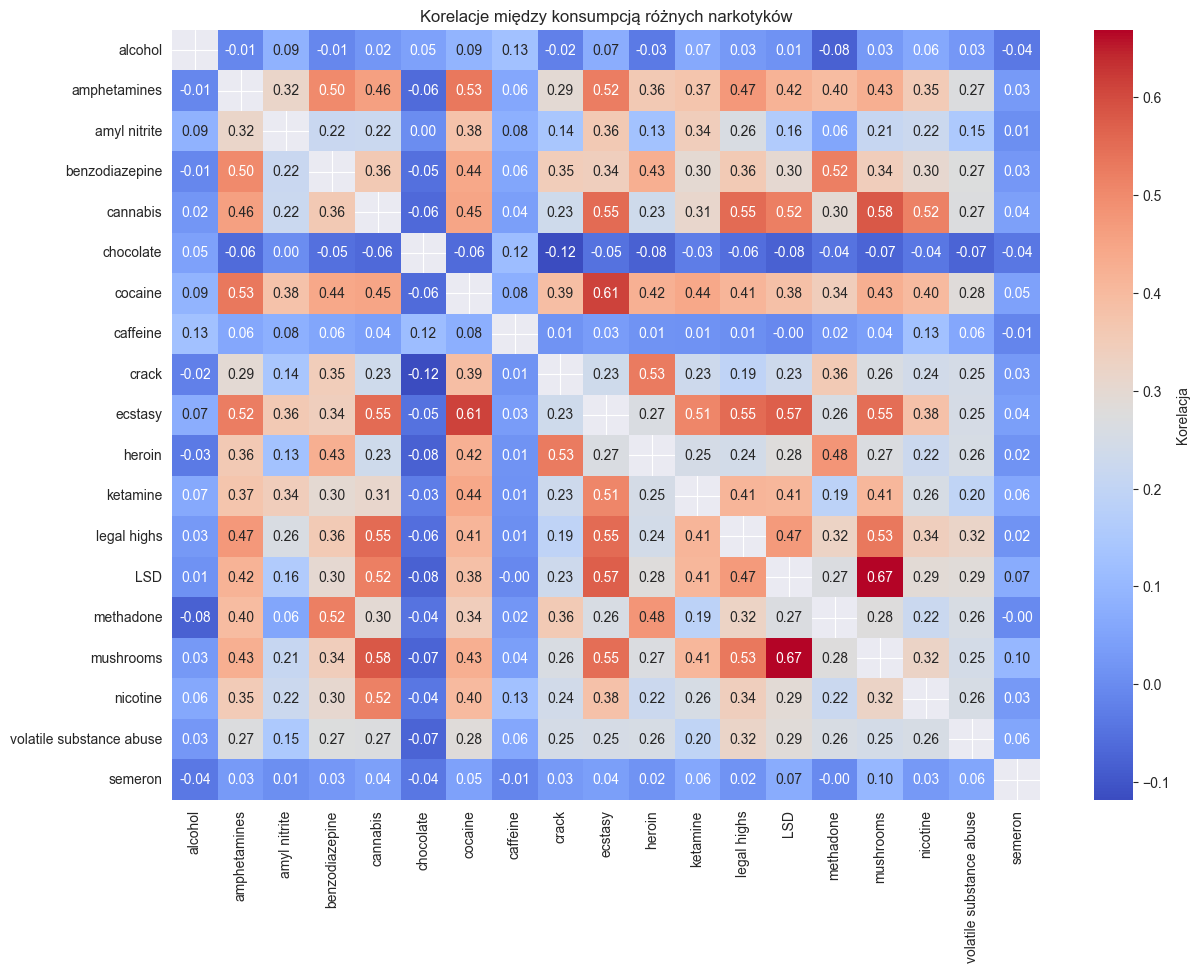

In [365]:
drug_and_drug_data = data[consumption_data_columns]
correlation_matrix_drug_drug = create_correlation_matrix(drug_and_drug_data)
show_correlation_matrix(correlation_matrix_drug_drug, 'Korelacje między konsumpcją różnych narkotyków')

##### Wnioski z macierzy korelacji między konsumpcją różnych narkotyków
Analizując macierz korelacji między konsumpcją różnych narkotyków, możemy zauważyć kilka ciekawych zależności.

Pierwszą rzeczą, którą można zauważyć, jest to, że konsumpcja czekolady i kofeiny jest słabo skorelowana z konsumpcją innych narkotyków. Jest to zrozumiałe, ponieważ czekolada i kofeina nie są narkotykami, a raczej powszechnie dostępnymi produktami spożywczymi.

Drugą rzeczą, która rzuca się w oczy, jest silna zależność pomiędzy jednym narkotykiem a większością innych. Można z tego wywnioskować, że osoby konsumujące jeden narkotyk, zazwyczaj konsumują również inne.

Bardzo ciekawy na macierzy jest alkohol, który nie wykazuje prawie żadnych silniejszych korelacji z innymi używkami. Wydawałoby się, że osoby konsumujące alkohol przejawiają większe skłonności do konsumpcji innych narkotyków, jednakże macierz korelacji wyraźnie temu przeczy.

## Wnioski ze wstępnej analizy danych
Na podstawie wstępnej analizy danych możemy wyciągnąć kilka wniosków i wskazać najsilniejsze zależności, które mogą przydać się w dalszej analizie i implementacji modeli:

1. **Wiek** - Wiek ma silne ujemne korelacje z konsumpcją narkotyków. Oznacza to, że im starsza osoba, tym mniej prawdopodobne, że konsumuje narkotyki.
2. **Płeć** - Mężczyźni częściej konsumują narkotyki.
3. **Wykształcenie** - Osoby o wyższym wykształceniu mniej konsumują narkotyków, natomiast częściej konsumują alkohol.
4. **Otwartość na doświadczenia** - Otwartość na doświadczenia posiada najsilniejsze korelacje z konsumpcją narkotyków ze wszystkich cech osobowości.
5. **Poszukiwanie doznań** - Poszukiwanie doznań również wykazuje silne korelacje z konsumpcją narkotyków.
6. **Sumienność** - Osoby o wyższym poziomie sumienności mają mniejsze skłonności do konsumpcji narkotków.
7. **Impulsywność** - Osoby o wyższym poziomie impulsywności przejawiają większe skłonności do konsumpcji narkotyków.
8. **Wszystkie używki poza alkoholem, kofeiną, czekoladą i semaronem** - Konsumpcja jednego narkotyku jest silnie skorelowana z konsumpcją innych narkotyków.

By zwizualizować te silne zależności, stworzymy wykresy punktowe, które pokażą jakie są zależności między wspomnianymi danymi a konsumpcją narkotyków. 

W tym celu wszystkie dane o narkotykach, oprócz wcześniej czterech wspomnianych: alkoholu, czekolady, kofeiny i semaronu, scalimy w jedną kolumnę, która będzie reprezentowała konsumpcję narkotyków. Następnie stworzymy wykresy punktowe, które pokażą jakie są zależności między danymi a konsumpcją narkotyków.

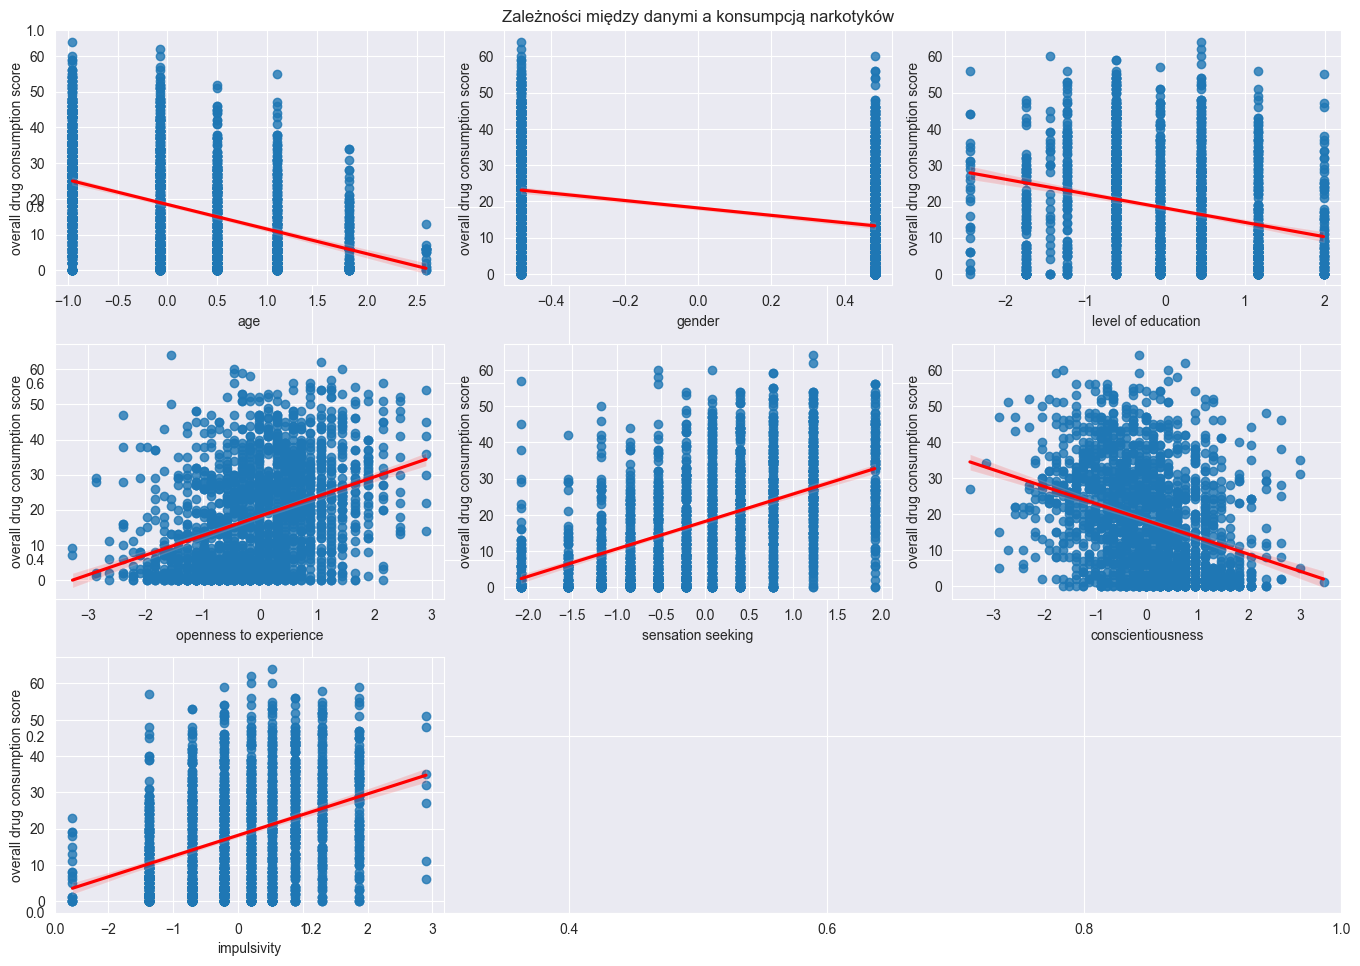

In [366]:
def create_drug_consumption_column(consumption_data):
    filtered_consumption_data_columns = [column for column in consumption_data_columns if column not in ['alcohol', 'chocolate', 'caffeine', 'semeron']]
    consumption_data['overall drug consumption score'] = consumption_data[filtered_consumption_data_columns].sum(axis=1)
    return consumption_data['overall drug consumption score']

def show_scatter_plots(dataset, columns, drug_consumption_column, title):
    plt.figure(figsize=(14, 10))
    plt.title(title)
    for i, column in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.regplot(x=column, y=drug_consumption_column, data=dataset, line_kws={'color': 'red'})
    plt.tight_layout()
    plt.show()

sum_drug_consumption_column = create_drug_consumption_column(data)

filtered_personal_data_columns = ['age', 'gender', 'level of education', 'openness to experience', 'sensation seeking', 'conscientiousness', 'impulsivity']

show_scatter_plots(data, filtered_personal_data_columns, sum_drug_consumption_column, 'Zależności między danymi a konsumpcją narkotyków')

### Wnioski z wykresów punktowych
Wykresy, tak jak wcześniej wspomniano, wykazują najsilniejsze korelacje między danymi a konsumpcją narkotyków. Z tą wiedzą możemy przejść do implementacji modeli, które będą przewidywały konsumpcję narkotyków na podstawie danych osobowych i danych o osobowości.

## Implementacja modeli
W celu implementacji modeli, które będą przewidywały konsumpcję narkotyków na podstawie danych osobowych i danych o osobowości, zastosujemy następujące kroki:
1. Podzielimy dane na zbiór treningowy i testowy
2. Zastosujemy skalowanie danych
3. Zastosujemy różne modele i sprawdzimy ich skuteczność
4. Wybierzemy najlepszy model
5. Sprawdzimy jakie są najważniejsze cechy

Najpierw wykorzystamy całe dane, a potem spróbujemy narzucić większą wagę na cechy, które wykazały najsilniejsze korelacje z konsumpcją narkotyków.


Logistic Regression
Accuracy Score:
0.17771883289124668

Random Forest
Accuracy Score:
0.5278514588859416

SVC
Accuracy Score:
0.14323607427055704

Random Forest with scale and class weights
Confusion Matrix:


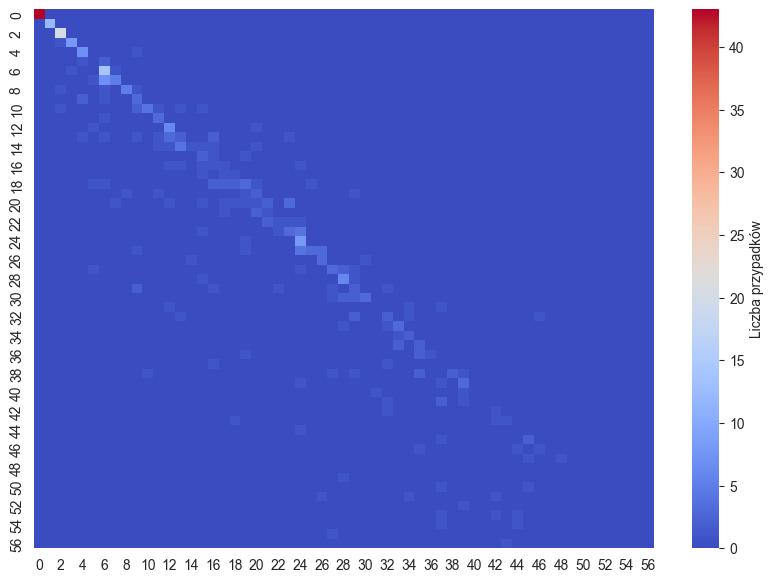

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        12
           2       0.87      1.00      0.93        20
           3       0.89      0.89      0.89         9
           4       0.64      0.88      0.74         8
           5       0.00      0.00      0.00         3
           6       0.50      0.88      0.64        16
           7       0.71      0.38      0.50        13
           8       0.83      0.62      0.71         8
           9       0.27      0.50      0.35         6
          10       0.80      0.40      0.53        10
          11       0.43      0.75      0.55         4
          12       0.46      0.75      0.57         8
          13       0.22      0.17      0.19        12
          14       0.50      0.10      0.17        10
          15       0.22      0.50      0.31         4
          16       0.11      0.17      0.13         6
    

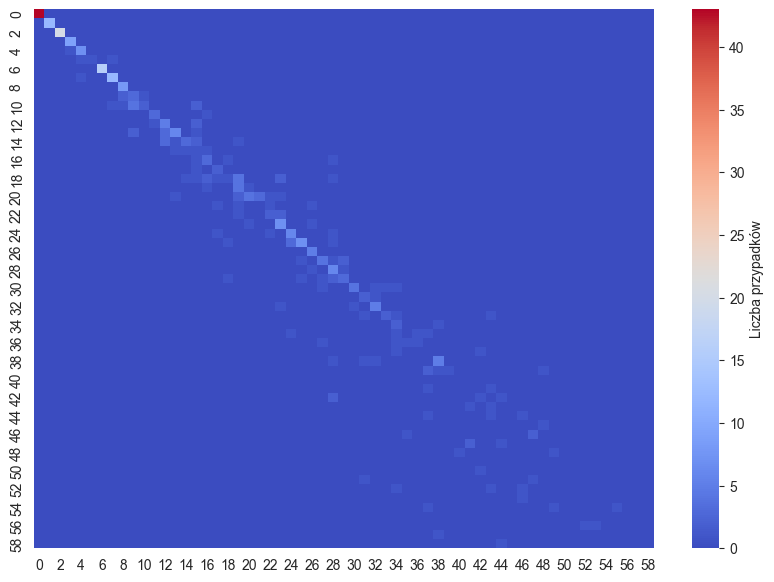

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        20
           3       0.90      1.00      0.95         9
           4       0.78      0.88      0.82         8
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00        16
           7       0.86      0.92      0.89        13
           8       0.73      1.00      0.84         8
           9       0.33      0.50      0.40         6
          10       0.67      0.20      0.31        10
          11       0.75      0.75      0.75         4
          12       0.45      0.62      0.53         8
          13       0.67      0.50      0.57        12
          14       0.60      0.30      0.40        10
          15       0.09      0.25      0.13         4
          16       0.38      0.50      0.43         6
    

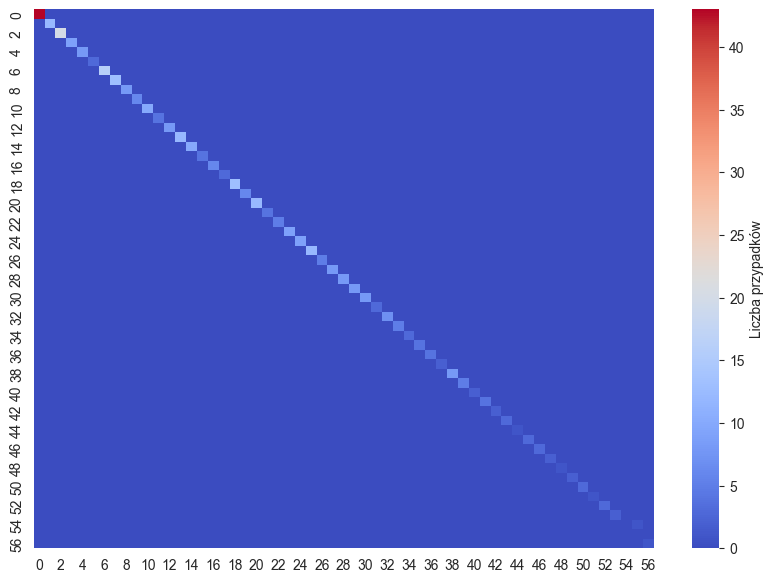

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         6
    

In [367]:
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
    
def split_data(data, test_size=0.2):
    X = data.drop(columns=consumption_data_columns)
    # y = data['nicotine']
    y = create_drug_consumption_column(data)
    return train_test_split(X, y, test_size=test_size, random_state=42)

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, show_features=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if show_features:
        print('Confusion Matrix:')
        show_confusion_matrix_as_plot(y_test, y_pred)
        print('Classification Report:')
        print(classification_report(y_test, y_pred, zero_division=1))
    print('Accuracy Score:')
    print(accuracy_score(y_test, y_pred))
    
def select_features_with_selector(model, X_train, y_train, X_test):
    selector = SelectFromModel(model, prefit=True)
    X_train = selector.transform(X_train)
    X_test = selector.transform(X_test)
    return X_train, X_test
    
def get_selected_input_data_class_weights():
    selected_column_indices = [index for index, column in enumerate(personal_information_data_columns + personality_data_columns) if column in filtered_personal_data_columns]
    weight_dict = {index: 1 for index in range(len(personal_information_data_columns + personality_data_columns))}
    for index in selected_column_indices:
        weight_dict[index] = 3
    return weight_dict

def show_confusion_matrix_as_plot(y_test, y_pred):
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred),  cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Liczba przypadków'})
    plt.show()

def implement_models(data):
    X_train, X_test, y_train, y_test = split_data(data)
    X_train, X_test = scale_data(X_train, X_test)
    
    logistic_regression = LogisticRegression(max_iter=1000)
    random_forest = RandomForestClassifier()
    svc = SVC()
    
    print('\nLogistic Regression')
    train_and_evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)
    
    print('\nRandom Forest')
    train_and_evaluate_model(random_forest, X_train, X_test, y_train, y_test)
    
    print('\nSVC')
    train_and_evaluate_model(svc, X_train, X_test, y_train, y_test)
    
    # Developing random forest
    
    class_weights = get_selected_input_data_class_weights()
    random_forest_with_weights = RandomForestClassifier(class_weight=class_weights)
    
    print('\nRandom Forest with scale and class weights')
    X_train, X_test, y_train, y_test = split_data(data)
    X_train, X_test = scale_data(X_train, X_test)
    random_forest_weight_copy = copy.copy(random_forest_with_weights)
    train_and_evaluate_model(random_forest_weight_copy, X_train, X_test, y_train, y_test, show_features=True)
    
    print('\nRandom Forest with scale, selector, but without class weights')
    X_train, X_test, y_train, y_test = split_data(data)
    X_train, X_test = scale_data(X_train, X_test)
    random_forest_copy = copy.copy(random_forest)
    X_train, X_test = select_features_with_selector(random_forest, X_train, y_train, X_test)
    train_and_evaluate_model(random_forest_copy, X_train, X_test, y_train, y_test, show_features=True)
    
    print('\nRandom Forest with scale, class weights and selector')
    X_train, X_test, y_train, y_test = split_data(data)
    X_train, X_test = scale_data(X_train, X_test)
    random_forest_copy = copy.copy(random_forest_weight_copy)
    X_train, X_test = select_features_with_selector(random_forest_copy, X_train, y_train, X_test)
    train_and_evaluate_model(random_forest_copy, X_train, X_test, y_train, y_test, show_features=True)
    
    
implement_models(data)


## Analiza i wnioski z implementacji modeli
Macierze pomyłek przedstawiają szacowane wyniki z sumy wszystkich punktów uzyskanych z testu konsumpcji narkotyków. Badanych było 18 używek z ocenami od 0 do 6. Oznacza to że maksymalnym wynikiem z testu jest 108 punktów. Przy aktualnym podziale danych widzimy, że zakres sięga do maksymalnie 56 punktów. 

Model, który uzyskaliśmy ma na celu oszacować na bazie naszych danych osobowych i danych o osobowości stwierdzić, ile szacunkowo punktów uzyskalibyśmy w takim teście konsumpcji narkotykow. 

Na bazie takich szacunkowych wyników moglibyśmy określić czy dana osoba przejawia uzależnienia od narkotyków, jednakże jak wiemy, są to tylko korelacje i przewidywania.

Z implementacji modeli możemy wyciągnąć kilka wniosków:
1. Najlepszym modelem okazał się **Random Forest**. Model ten osiągnął najwyższą skuteczność na zbiorze testowym. Przy wielu próbach, skuteczność modelu wynosiła około **0.5**. Wynosi to około **0.35** więcej niż w przypadku SVC i regresji logistycznej. W związku z tym, że Random Forest osiągnął najlepsze wyniki, skupiłem się na nim.
2. Następny model wykorzystuje skalowanie danych i klasy ważone. Nie zaobserwowałem poprawy, wyniki były do siebie bardzo zbliżone
3. Kolejnym modelem był model wykorzystujący selektor, ale bez klas ważonych. Model poprawił się znacząco, często poprawiając wynik śrendio o **0.2** a czasem o **0.3**.
4. Końcowy model wykorzystuje wszystkie metody usprawnienia, to jest: skalowanie, klasy ważone oraz selektor. Model okazał się być bardzo wydajny, wykazując wyniki bliskie **0.99**.

## Wnioski z projektu o analizie korelacji zażywania narkotyków i używek a danymi osobowymi i cechami osobowości
Tak jak można było zakładać i oczekiwać - dane i cechy osobowości człowieka wykazują jasną korelację z zażywaniem narkotyków i innych używek. Bazując na teście osobowości (NEO-FFI-R) można oszacować, jakie są skłonności danej osoby do zażywania narkotyków. 

Badania, które przeprowadziłem, i dane, które przeanalizowałem, pozwoliły mi nie tylko poszerzyć swoją wiedzę w kontekście analizy danych, ale również dowiedziałem się wielu ciekawych rzeczy na temat ludzkiej psychiki i zachowań.

Szczególnie ciekawe i dające do myślenia był dla mnie histogram konsumowania narkotyków przez badane osoby. Widać, że konsumpcja ciężkich narkotyków (takich jak crack, heroina, ecstasy) jest dużo rzadsza niż konsumpcja lżejszych używek (takich jak alkohol, kofeina), ale przy tym bardzo rzuca się w oczy konsumpcja nikotyny - albo nigdy albo w ostatnim dniu.